In [1]:
import keras
from keras import backend as K
from keras.layers import Input, Convolution2D, MaxPooling2D, Activation, concatenate, Dropout, warnings
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D
from keras.models import Model
from keras.engine.topology import get_source_inputs
from keras.utils import get_file
from keras.utils import layer_utils

Using TensorFlow backend.


In [2]:
def squeezenet(input_shape,n_classes):
    
    #fire block
    def fire(x,fs,fe):
        
        #squeeze
        s=Convolution2D(fs,1,activation='relu')(x)
        
        #expand
        e1=Convolution2D(fe,1,activation='relu')(s)
        e2=Convolution2D(fe,3,padding='same',activation='relu')(s)
        
        output=concatenate([e1,e2])
        
        return output
    
    input=Input(input_shape)
    x=Convolution2D(96,7,strides=2,padding='same',activation='relu')(input)
    x=MaxPooling2D(3,strides=2,padding='same')(x)
    
    
    x=fire(x,16,64)
    x=fire(x,16,64)
    x=fire(x,32,128)
    
    x=MaxPooling2D(3,strides=2,padding='same')(x)
    
    x=fire(x,32,128)
    x=fire(x,48,192)
    x=fire(x,48,192)
    x=fire(x,64,256)
    
    x=MaxPooling2D(3,strides=2,padding='same')(x)
    
    x=fire(x,64,256)
    x=Convolution2D(n_classes,1,activation='relu')(x)
    
    x=GlobalAveragePooling2D()(x)
    
    output=Activation('softmax')(x)
    
    model=Model(input,output)
    
    return model

In [3]:
INPUT_SHAPE=224,224,3
N_CLASSES=1000
model=squeezenet(INPUT_SHAPE,N_CLASSES)
model.summary()





__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 112, 112, 96) 14208       input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 56, 56, 96)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 56, 56, 16)   1552        max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
conv2d

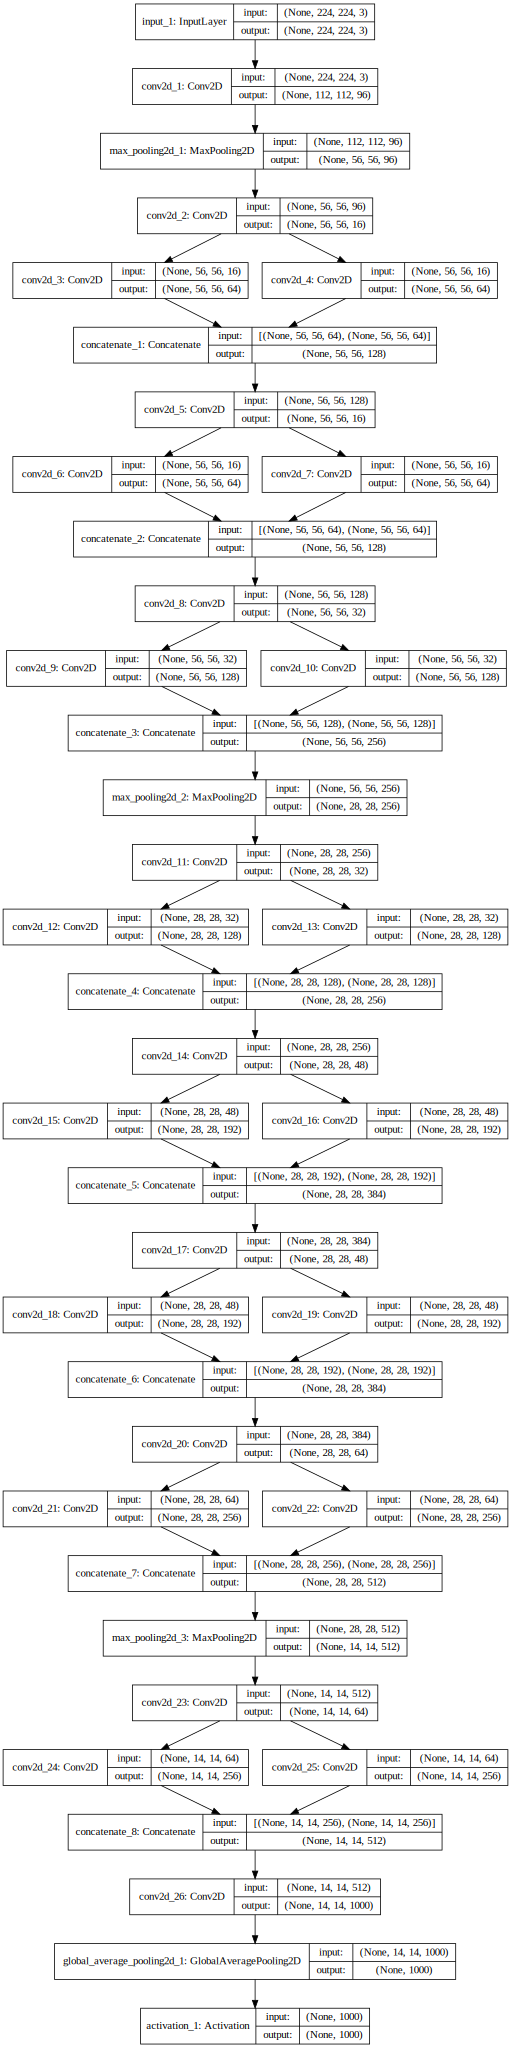

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))